# Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [2]:
dirName = '../../data/'
fileName = dirName + 'training.csv'
data = pd.read_csv(fileName)

## Data Preprocessing

In [3]:
# replace missing values with NaN
# data = data.replace(-999.0, np.nan)

# learning data
X = data.copy()
del X['EventId']
del X['Weight']
del X['Label']
y = data['Label']
w = data['Weight']

In [56]:
# handle missing values
from sklearn.preprocessing import Imputer

# replace missing values with NaN
X = X.replace(-999.0, np.nan)

# missing_values is the value of your placeholder, strategy is if you'd like mean, median or mode, and axis=0 means it calculates the imputation based on the other feature values for that sample
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(X)
Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)
missingX = imp.transform(X)

In [57]:
X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,...,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,...,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,...,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,...,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
7,154.916,10.418,94.714,29.169,NaN,NaN,NaN,2.897,1.526,138.178,...,-1.761,187.299,1,30.638,-0.715,-1.724,NaN,NaN,NaN,30.638
8,105.594,50.559,100.989,4.288,NaN,NaN,NaN,2.904,4.288,65.333,...,0.024,129.804,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
9,128.053,88.941,69.272,193.392,NaN,NaN,NaN,1.609,28.859,255.123,...,0.845,294.741,1,167.735,-2.767,-2.514,NaN,NaN,NaN,167.735


### Splitting training set to - real training and training test

In [4]:
Xtrain = X[1:225000]
Xtest = X[-25000:]
ytrain = y[1:225000]
ytest = y[-25000:]
wtrain = w[1:225000]
wtest = w[-25000:]

## Logistic Regression

### Training

In [5]:
# imports
import numpy as np
from sklearn import linear_model

In [6]:
# model
logistic = linear_model.LogisticRegression(C=1e5)

In [7]:
# fit
logistic.fit(Xtrain, ytrain)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Validation

In [8]:
# validation
predicted = logistic.predict(Xtest)

In [9]:
# compute AMS
def ams(s, b):
    from math import sqrt,log
    if b==0:
        return 0

    return sqrt(2*((s+b+10)*log(1+float(s)/(b+10))-s))

In [11]:
# compute all measures
def validate(predicted, real, weights):
    sumsig = 0.
    sumbkg = 0.
    tp = 0.
    tn = 0.
    fp = 0.
    fn = 0.
    precision = 0.
    recall = 0.
    acc = 0.
    
    if (predicted.shape[0] != real.shape[0]):
        raise Exception
    
    for i in range(predicted.shape[0]):
        if predicted[i] == "s":
            if real[i] == "s":
                sumsig += weights[i]
                tp += 1
            else:
                sumbkg += weights[i]
                fp += 1
        else:
            if real[i] == "s":
                fn += 1
            else:
                tn += 1
    
    # calculate scores
    amsscore = ams(sumsig * 10, sumbkg * 10)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    acc = (tp + tn) / (tp + fp + tn + fn)
    f1score = (2 * precision * recall)/(precision + recall)

    # printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore)
    
    return amsscore

In [12]:
def printScores(tp, tn, fp, fn, precision, recall, acc, f1score, amsscore):
    all = tp + tn + fp + fn
    print("TP: ", tp/all)
    print("TN: ", tn/all)
    print("FP: ", fp/all)
    print("FN: ", fn/all)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("Acc: ", acc)
    print("F1: ", f1score)
    print("AMS: ", amsscore)

In [13]:
validate(predicted, np.array(ytest), np.array(wtest))

2.0147979285683175

In [14]:
barX = list(abs(logistic.coef_[0]))

In [15]:
barV = list(X.columns.values)
ind = np.arange(30)

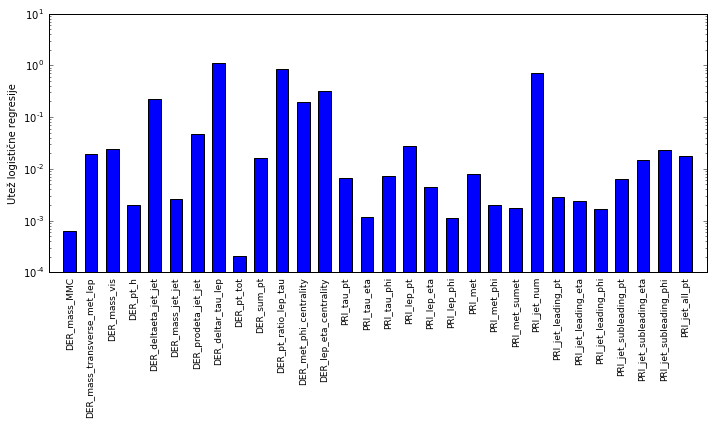

In [46]:
fig = plt.figure(figsize=(10,6)) 
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, barX, width=0.6, align='center', color='b')
plt.yscale('log')
ax.set_xticklabels(barV)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=9)
plt.xticks(range(30))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
#ax.xaxis.set_major_locator(1)
plt.xlim([-1,30])
plt.ylabel('Utež logistične regresije')
plt.tight_layout()
plt.savefig('lr_weights.pdf')

## Export for Kaggle

In [167]:
dirName = '../../data/'
fileName = dirName + 'test.csv'
dataRealTest = pd.read_csv(fileName)

# learning data
Xrealtest = dataRealTest.copy()
EventId = np.array(Xrealtest['EventId'])
del Xrealtest['EventId']

In [154]:
# prediction
predictedTest = logistic.predict(Xrealtest)
predictedP = logistic.predict_proba(Xrealtest)
predictedP = predictedP[:,0]

In [155]:
# make matrix
for i in range(len(predictedP)):
    

In [185]:
resultM = np.concatenate((np.matrix(EventId).T, np.matrix(predictedTest).T, np.matrix(predictedP).T), axis=1)

In [214]:
dt = np.dtype([('EventId', np.str_, 16), ('Label', np.str_, 2), ('Weight', np.float_, (4,))])
resultA = np.array(resultM);

In [224]:
alltestsorted = sorted(resultA, key=lambda entry: entry[2])

In [227]:
submissionfilename="submission_logistic.csv"
print("Final loop to write the submission file",submissionfilename)
outputfile=open(submissionfilename,"w")
outputfile.write("EventId,RankOrder,Class\n")
iid=headertest.index("EventId")
if iid<0:
    print("ERROR could not find variable EventId in test file")
    raise Exception # should not happen

rank=1 # kaggle wants to start at 1
for entry in alltestsorted:
    slabel = entry[1]

    outputfile.write(str(entry[iid])+",")
    outputfile.write(str(rank)+",")
    outputfile.write(slabel)            
    outputfile.write("\n")
    rank+=1


outputfile.close()
print(" You can now submit ",submissionfilename," to kaggle site")

Final loop to write the submission file submission_logistic.csv
 You can now submit  submission_logistic.csv  to kaggle site


Kaggle score AMS = 1.998